In [1]:
from tensorflow import keras   
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


5

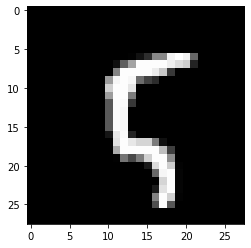

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100,:,:,0],cmap='gray')
y_train[100]

In [19]:
x_train = np.pad(x_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
x_test = np.pad(x_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

x_train.shape

(60000, 32, 32, 1)

In [23]:
from tensorflow import one_hot

y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, ZeroPadding2D, Activation, Flatten, AveragePooling2D

model = Sequential()

model.add(Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32, 32, 1), padding='same'))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
model.add(AveragePooling2D())

model.add(Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10, activation = 'softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2226 - accuracy: 0.9332 - val_loss: 0.1103 - val_accuracy: 0.9680
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0939 - accuracy: 0.9718 - val_loss: 0.0822 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0832 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0573 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0543 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0450 - val_a

### Model summary

In [26]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_26 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_27 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_31 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_12 (Flatten)        (None, 480)             

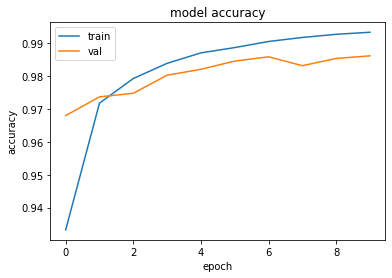

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

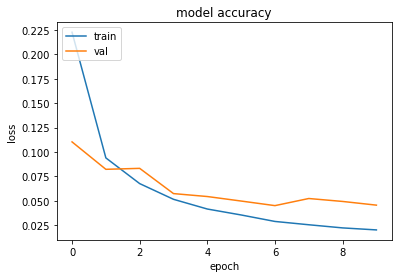

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()